# Bank Customer Churn Prediction


#### The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

### About the dataset

#### The dataset has several factors that can influence the customer to leave the bank, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

### Data Dictionary
| Column Name | Description |
| --- | --- |
| RowNumber | Row number |
| CustomerId | Unique identification key for different customers |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
|Geography | Country of the customer |
|Age | Age of the customer |
|Tenure | Number of years for which the customer has been with the bank |
|Balance | Bank balance of the customer |
|NumOfProducts | Number of bank products the customer is utilising |
|HasCrCard | Binary flag for whether the customer holds a credit card with the bank or not |
|IsActiveMember | Binary flag for whether the customer is an active member with the bank or not |
|EstimatedSalary | Estimated salary of the customer in Dollars |
|Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('churn.csv')
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4007,4008,15645496,Seleznyova,648,France,Female,43,7,139972.18,1,1,0,143668.58,0
4566,4567,15580682,Tsai,652,France,Female,40,4,79927.36,2,1,1,33524.60,0
7366,7367,15649183,Johnston,598,Spain,Female,35,8,0.00,3,0,1,88658.73,0
262,263,15686776,Rossi,557,France,Female,32,6,184686.41,2,1,0,14956.44,0
180,181,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0


In [3]:
data.shape

(10000, 14)

In [4]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [5]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
data.duplicated().sum()

0

In [8]:
#renaming the column from 'Exited' to 'Churn
data.rename(columns={'Exited':'Churn'}, inplace=True)

In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
1400,684,France,Female,27,9,122550.05,2,0,1,137835.82,0
6976,701,Spain,Female,39,9,0.00,2,1,1,110043.88,0
1745,529,France,Male,30,2,116295.29,1,1,0,75285.47,0
9317,741,France,Male,42,6,106036.52,1,1,0,194686.78,1
3332,735,France,Male,31,3,119558.35,1,0,0,72927.68,0


## Exploratory Data Analysis

### Pie chart for customer churn

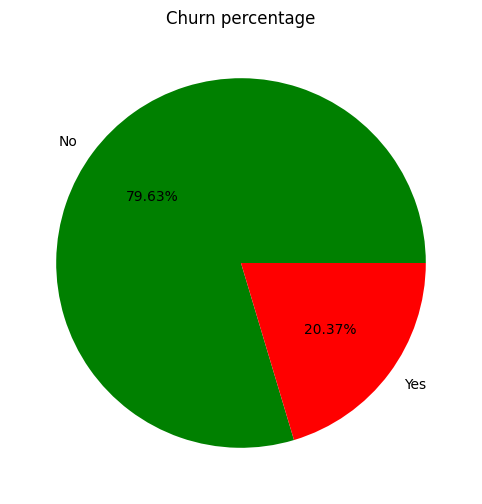

In [11]:
colors = ['green', 'red']
plt.figure(figsize=(10, 6))
plt.pie(data['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%', colors=colors)
plt.title('Churn percentage')
plt.show()


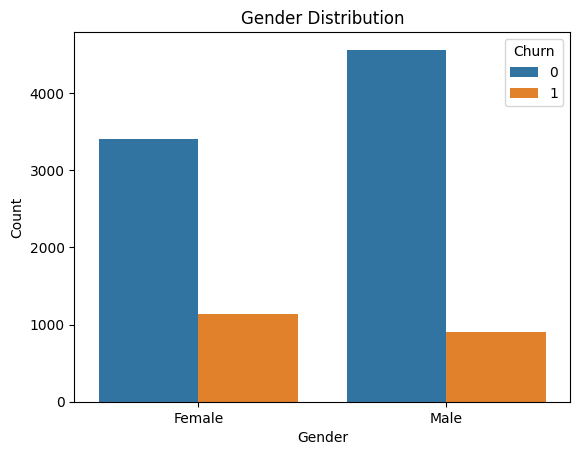

In [12]:
#gender and customer churn
sns.countplot(x = 'Gender', data = data, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- As shown in the graph, majority of the customers are male. But upon looking at the customer churn, we can see that females have more tendency to churn as compared to males. 

<Axes: xlabel='Age', ylabel='Count'>

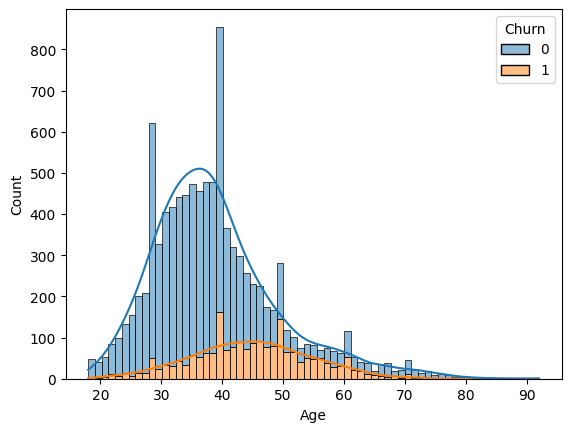

In [13]:
#histogram for age distribution
sns.histplot(data=data, x="Age", hue="Churn", multiple="stack",kde=True)

- This histtogram visualizes the age distribution and the churn count of the customers. 
- The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. 
- In addition to that customers from age group 20-25 years old count for the lowest churn count. 
- Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

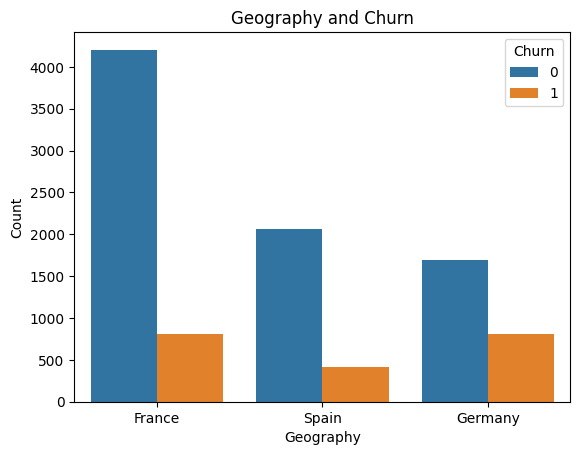

In [14]:
#Customer location
sns.countplot(x = 'Geography', hue = 'Churn', data = data)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

- Majority of the customers are from France, followed by Spain and Germany. 
- However in contrast to that Germany has the highest number of customer curn followed by France and Spain. 
- From this we can infer that German customers are more likely to churn than the customers from other countries.

<Axes: xlabel='Tenure', ylabel='count'>

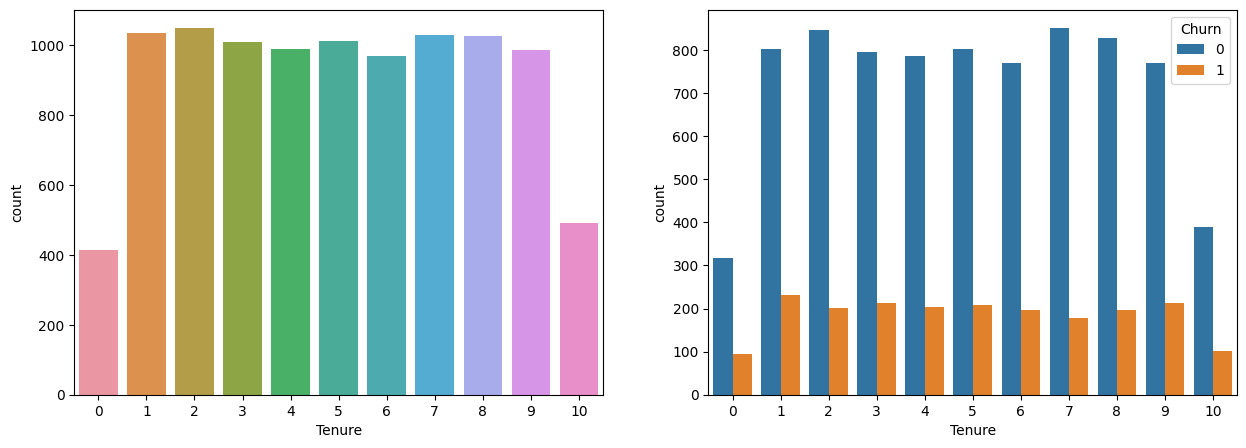

In [15]:
# Tenure
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=data,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=data,ax=ax[1])

Tensure refers to the time (in years) that a customer has been a client of the bank. 
- Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. 
- There are very few customers with a tenure of less than 1 years or more than 9 years, looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure.
- However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn.

<Axes: xlabel='Balance', ylabel='Count'>

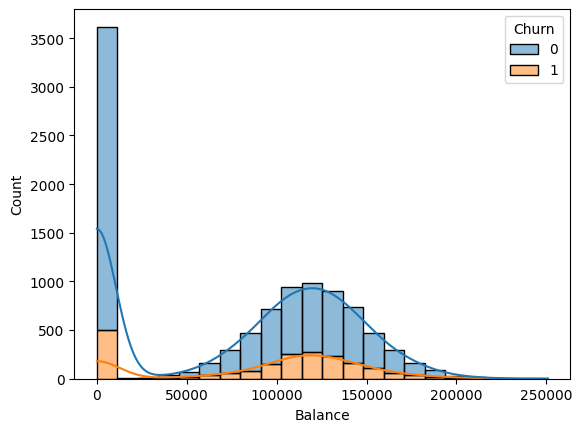

In [16]:
#bank balance 
sns.histplot(data=data, x="Balance", hue="Churn", multiple="stack",kde=True)

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

#### Number of product purchased

<Axes: xlabel='NumOfProducts', ylabel='count'>

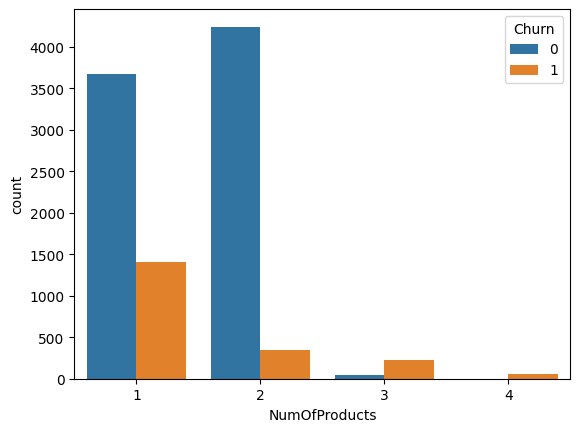

In [17]:

sns.countplot(x='NumOfProducts', hue='Churn', data=data)

In the dataset, we have customers in four categories according to the number of products purchased. 
- The customers with purchase or 1 or 2 products are highest in number and have low churn count in comparison to the non churn customers in the category. 
- However, in the category where customers have purchased 3 or 4 products the number of leaving customers is much higher than the non leaving customers.

#### Customers with/without credit card

<Axes: xlabel='HasCrCard', ylabel='count'>

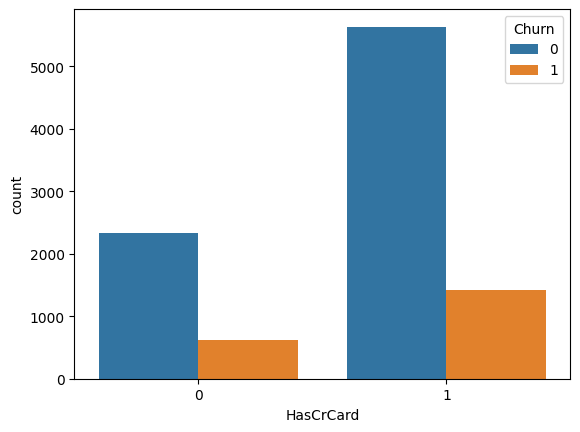

In [18]:
sns.countplot(x=data['HasCrCard'],hue=data['Churn'])

Majoity of the customers have credit cards i.e. nealy 70% of the customers have credit cards leaving 30% of the customers who do not have credit cards. 
- Moreover, the number of customers leaving the bank are more whom have a credit card.

### Active member

<Axes: xlabel='IsActiveMember', ylabel='count'>

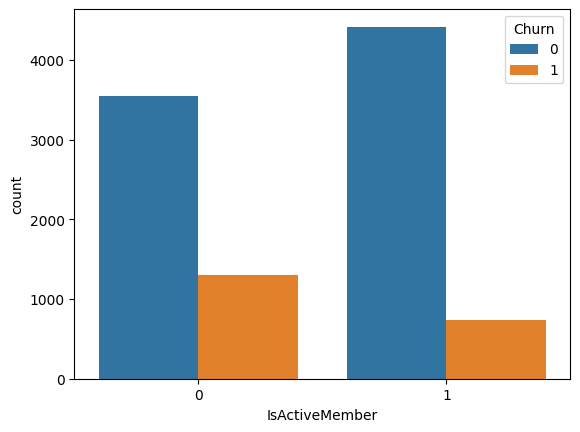

In [19]:
sns.countplot(x='IsActiveMember', hue='Churn', data=data)

- As expected, the churn count is higher for non active members as compared to the active members of the bank. 
- This is because the active members are more satisfied with the services of the bank and hence they are less likely to leave the bank.
- Therefore, the bank should focus on the non active members and try to improve their services to retain them.

#### Estimated Salary

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

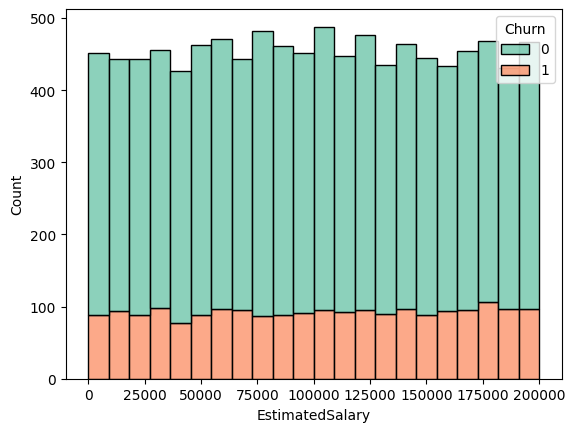

In [20]:
sns.histplot(data=data,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the estimated salary of the customers along with the churn count. 
- On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't.

### Label encoding the variables 

In [21]:
from sklearn.preprocessing import LabelEncoder
variables = ['Geography', 'Gender']
LE = LabelEncoder()
for i in variables:
    LE.fit(data[i].unique())
    data[i]=LE.transform(data[i])
    print(i,data[i].unique())


Geography [0 2 1]
Gender [0 1]


#### Normalization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['CreditScore','Balance','EstimatedSalary']]=scaler.fit_transform(data[['CreditScore','Balance','EstimatedSalary']])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


### Corelation matrix heatmap

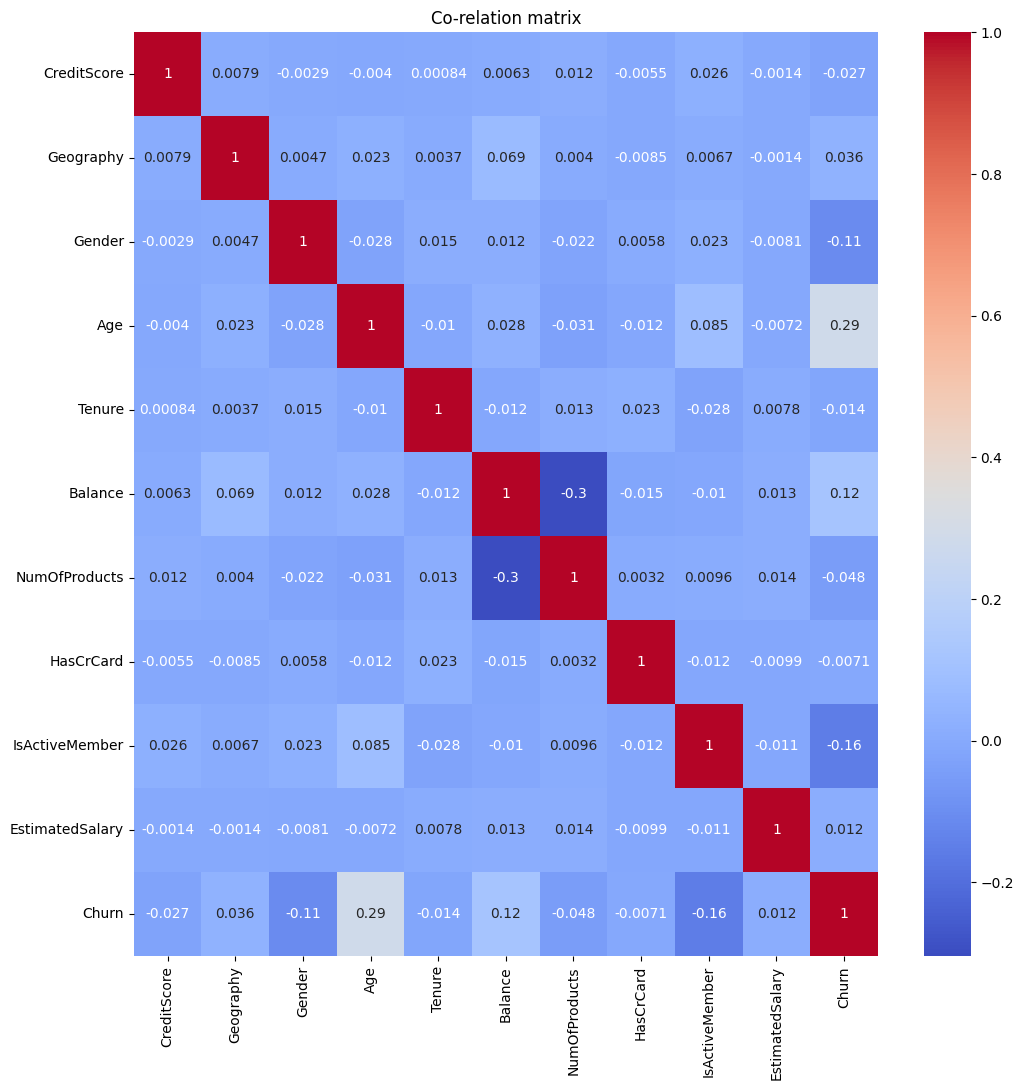

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Co-relation matrix')
plt.show()

There is no significant coorelation among the variables. So, I will proceed to model building.

## Random forest classifier

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('Churn',axis=1),data['Churn'],test_size=0.3,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

In [27]:
from sklearn.model_selection import GridSearchCV
#Creating grid search object & Fitting the grid search object to the training data
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
grid_rfc.fit(X_train, y_train)
print('Best parameters found: ', grid_rfc.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


Adding parameters to the model

In [28]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [29]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.8767142857142857

In [30]:
rfc_pred = rfc.predict(X_test)

## Model evalution

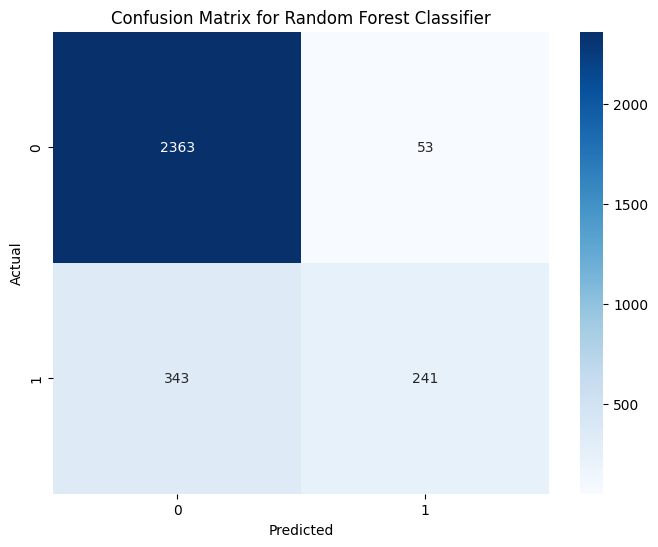

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13108\2454429136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Admin\AppData\Local\Temp\ipykernel_13108\2454429136.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<Axes: xlabel='Churn', ylabel='Density'>

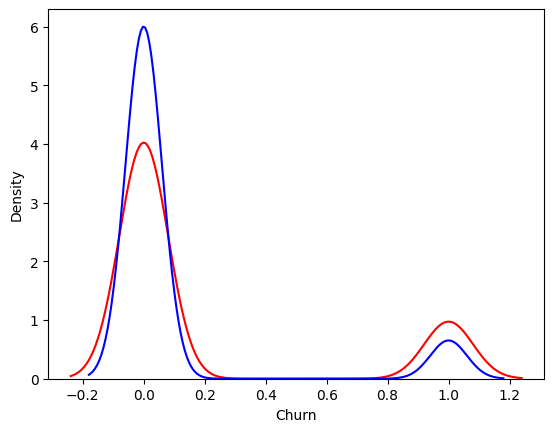

In [32]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000

